# Prediction of WQI based on linear regression

### Packages used

In [1]:
import turicreate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import turicreate_cross_validation.cross_validation as tcv
import numpy as np

%matplotlib inline

## Loading Data

Routine freshwater monitoring data collected by the The WA State Department of Ecology's River and Stream Monitoring Program are summarized by a technique called the "Water Quality Index" (WQI). The WQI ranges from 1 (poor quality) to 100 (good quality). The WQI summary does not include non-standard elements like metals. For temperature, pH, oxygen, and fecal coliform bacteria, the WQI is based on criteria in Washington’s Water Quality Standards, WAC 173-201A. For nutrient and sediment measures where standards are not specific, results are based on expected conditions in a given region. Multiple constituents are combined and results aggregated over time to produce a single score for each station and each year. All current long-term Ecology monitoring stations with at least 5 years data are included. Most stations are located near the mouths of major streams. These stations integrate upstream water quality and capture large basin-scale trends. However, status and trends at these locations may not reflect status or trends in any particular sub-basin. Scores for individual parameters are presented as **Oxygen (Oxy) , pH, temperature (TEMP), total suspended sediment (TSS), turbidity(Turb), nitrogen(TPN), and phosphorus(TP).**

In [2]:
data=turicreate.SFrame('WQI_Parameter_Scores_1994-2013.csv')

Finished parsing file /mnt/c/Users/RAJARSHI MAITY/Documents/Python/Water Quality/WQI_Parameter_Scores_1994-2013.csv

Parsing completed. Parsed 100 lines in 0.114932 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,int,int,int,int,int,int,int,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/RAJARSHI MAITY/Documents/Python/Water Quality/WQI_Parameter_Scores_1994-2013.csv

Parsing completed. Parsed 971 lines in 0.110891 secs.

In [3]:
sa=turicreate.SArray([i for i in range (1,972)])
data=data.add_column(sa,column_name='Sl.no')

### Function to divide data into class

In [4]:
def quality_check(num):
    s=''
    if num <=100 and num >=95 :
        s='Excellent'
    elif num <=94 and num >=80:
        s= 'Good'
    elif num <=79 and num >=65:
        s='Fair'
    elif num <=64 and num >=45:
        s='Marginal'
    elif num <=44:
        s='Poor'
    return s

In [5]:
data['quality']=data['Overall WQI'].apply(quality_check)

In [6]:
data
data1=data.to_dataframe()

In [7]:
turicreate.visualization.scatter(data['WQI pH'], data['Overall WQI'])

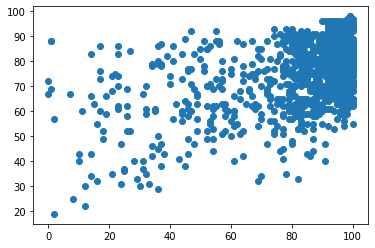

In [11]:
plt.plot(data['WQI TPN'],data['Overall WQI'],'o')

In [8]:
train_data,test_data=data.random_split(0.8,seed=0)


In [9]:
data

Station,Station Name,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN,WQI TP
16A070,Skokomish R nr Potlatch,1996,87,91,85,95,78,81,99,84
16A070,Skokomish R nr Potlatch,1997,86,78,84,77,85,90,99,72
16A070,Skokomish R nr Potlatch,1998,75,90,79,88,61,90,98,71
16A070,Skokomish R nr Potlatch,1999,87,88,80,88,75,95,100,79
16A070,Skokomish R nr Potlatch,2000,95,93,86,96,84,90,100,84
16A070,Skokomish R nr Potlatch,2001,95,94,85,98,100,83,100,90
16A070,Skokomish R nr Potlatch,2002,94,89,84,94,88,84,100,83
16A070,Skokomish R nr Potlatch,2003,85,88,85,93,73,86,100,72
16A070,Skokomish R nr Potlatch,2004,70,84,80,92,56,68,100,45
16A070,Skokomish R nr Potlatch,2005,67,74,82,92,53,82,98,60


## Data visualization

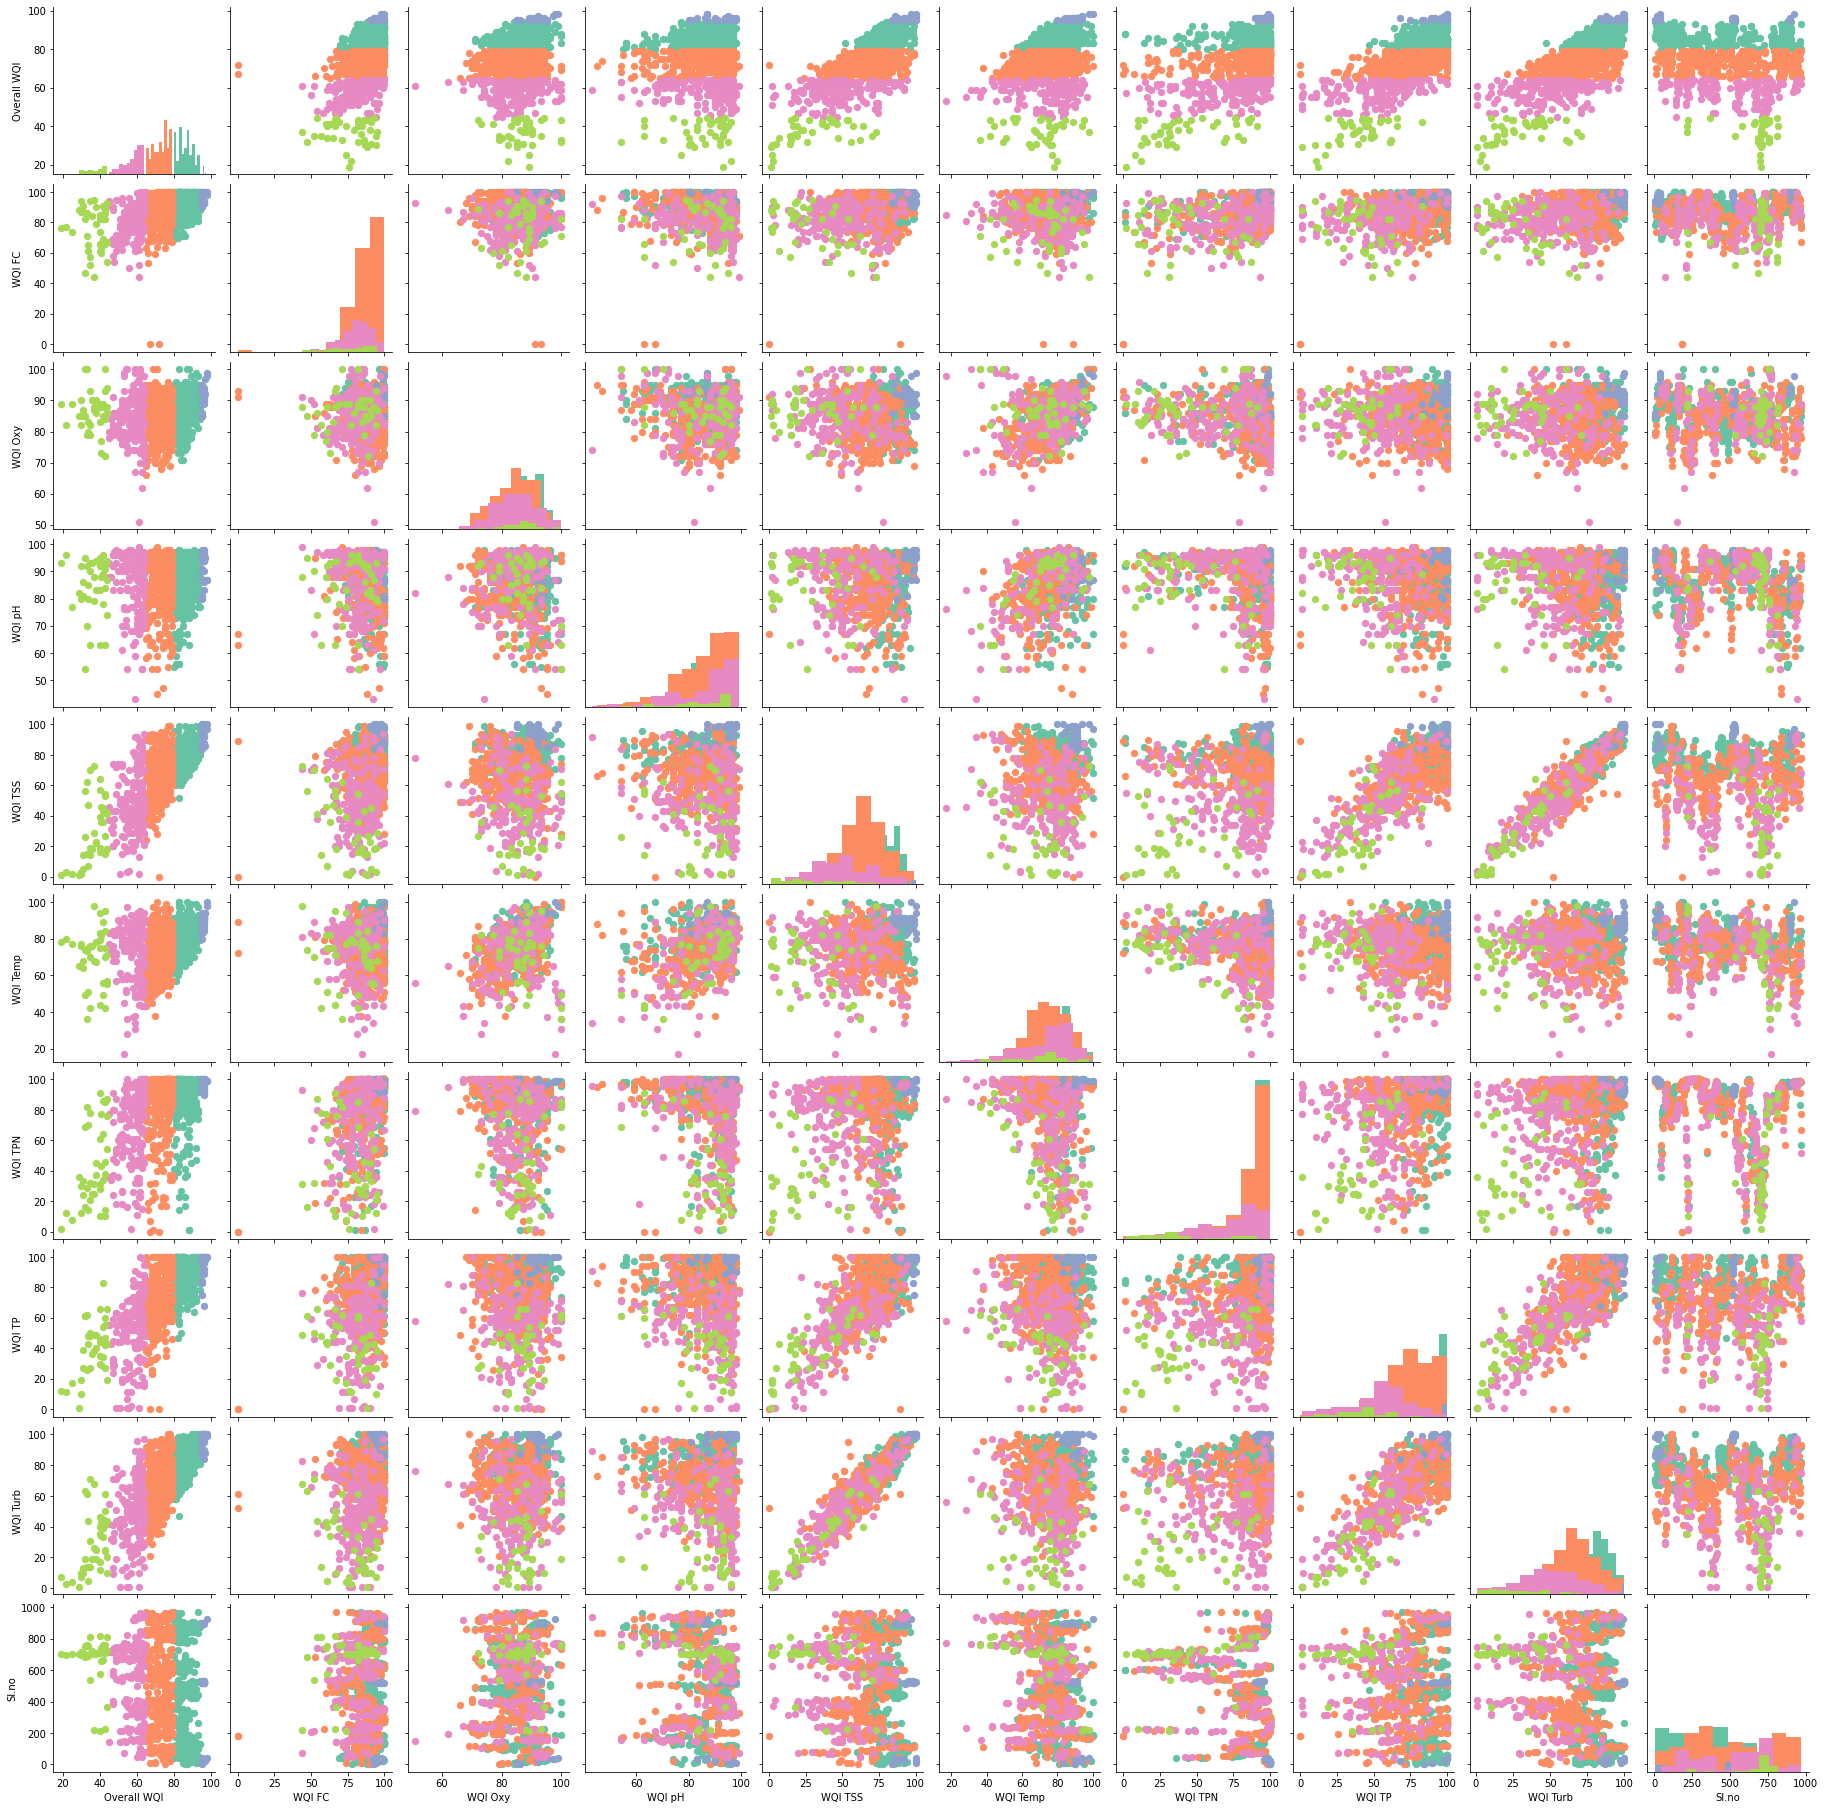

In [101]:
g=sns.PairGrid(data1.iloc[:,3:15],hue = 'quality',palette="Set2")
g=g.map_diag(plt.hist)
g=g.map_offdiag(plt.scatter,s=40)
plt.show()


In [10]:
model_1= turicreate.linear_regression.create(train_data,target='Overall WQI',features=['WQI FC',
 'WQI Oxy',
 'WQI pH',
 'WQI TSS',
 'WQI Temp',
 'WQI TPN',
 'WQI TP',
 'WQI Turb'
 ])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 734

Number of features          : 8

Number of unpacked features : 8

Number of coefficients    : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.010508     | 51.877214          | 17.441550            | 5.384897                        | 6.182919                          |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [11]:
model_1.evaluate(test_data)

{'max_error': 35.70102554961721, 'rmse': 6.462242048880141}

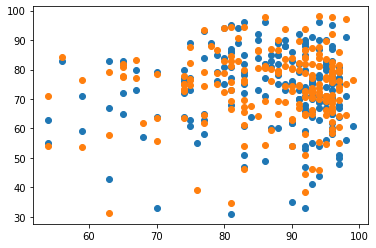

In [18]:
plt.plot(test_data['WQI pH'],test_data['Overall WQI'],'o',test_data['WQI pH'],model_1.predict(test_data),'o')

In [13]:
model_1.predict(data[data['Sl.no']==2])

dtype: float
Rows: 1
[83.29649594551142]

In [14]:
print(model_1.coefficients)

+-------------+-------+---------------------+----------------------+
|     name    | index |        value        |        stderr        |
+-------------+-------+---------------------+----------------------+
| (intercept) |  None |  -46.64271452262716 |  3.906802718359943   |
|    WQI FC   |  None | 0.21616986492352122 | 0.02271055801955295  |
|   WQI Oxy   |  None |  0.1797690877698931 | 0.03361652068177223  |
|    WQI pH   |  None |  0.2010255177253175 | 0.023293613737782666 |
|   WQI TSS   |  None | 0.16170050524933594 | 0.028625339961332614 |
|   WQI Temp  |  None |  0.2827958869455654 | 0.01994708095298334  |
|   WQI TPN   |  None | 0.20610035193503906 | 0.010282846576565753 |
|    WQI TP   |  None |  0.066558015724378  | 0.01718531349472357  |
|   WQI Turb  |  None |  0.2263263502695618 | 0.02983217678751836  |
+-------------+-------+---------------------+----------------------+
[9 rows x 4 columns]



# Logistic Regression with L2 regularization

## Selecting L2 penalty via cross validation
We will implement a kind of cross-validation called k-fold cross-validation. This method involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
...
Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. 
To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. Turi Create has a utility function for shuffling a given SFrame. We reserve 20% of the data as the test set and shuffle the remainder. ( seed=1 is fixed to get consistent answer.)

In [132]:
(train_valid, test) = data.random_split(.8, seed=0)
train_valid_shuffled = tcv.shuffle_sframe(train_valid, random_seed=0)
train_valid_shuffled[0:10]

Station,Station Name,Year,Overall WQI,WQI FC,WQI Oxy,WQI pH,WQI TSS,WQI Temp,WQI TPN
45A110,Wenatchee R nrLeavenworth ...,2009,77,94,73,91,60,79,89
19C060,West Twin R. nr mouth,2008,79,94,87,87,61,88,36
62A150,Pend Oreille R @ Newport,1998,84,100,79,80,73,79,100
38A050,Naches R @ Yakima on USHWY 97 ...,2011,79,86,93,86,60,86,98
35B060,Tucannon R @ Powers,-118,63,76,91,54,59,58,95
05A090,SF Stillaguamish @Arlington ...,1997,73,93,79,92,55,68,82
07A090,Snohomish R @ Snohomish,1996,82,78,93,92,71,83,76
32A070,Walla Walla R nr Touchet,-118,34,61,80,80,7,51,70
39A090,Yakima R nr Cle Elum,2002,84,95,80,87,74,78,95
11A070,Nisqually R @ Nisqually,2010,83,93,83,98,80,74,91


In [133]:
print (len(train_valid_shuffled))

773


# Exploring different L2 penalties

In [135]:
main_features=['WQI FC',
 'WQI Oxy',
 'WQI pH',
 'WQI TSS',
 'WQI Temp',
 'WQI TPN',
 'WQI TP',
 'WQI Turb'
 ]

In [136]:
table = turicreate.SFrame({'word': ['(intercept)'] + main_features})
def add_coefficients_to_table(coefficients, column_name):
    table[column_name] = coefficients
    return table

In [137]:
L2_penalties=[0,0.05,0.2,1e2,1e5]

In [138]:
model_2_1=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=0,
                                                verbose=False)

coefficients_0_penalty=model_2_1.coefficients['value']

model_2_2=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=0.05,
                                                  verbose=False)

coefficients_05_penalty=model_2_2.coefficients['value']

model_2_3=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=0.2,
                                                  verbose=False)

coefficients_2_penalty=model_2_3.coefficients['value']


model_2_4=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=1e2,
                                                verbose=False)

coefficients_1e2_penalty=model_2_4.coefficients['value']

model_2_5=turicreate.linear_regression.create(train_data, target = 'Overall WQI', features = main_features, 
                                                  l2_penalty=1e5,
                                                verbose=False)

coefficients_1e5_penalty=model_2_5.coefficients['value']


## Compare coefficients

We now compare the **coefficients** for each of the models that were trained above. We will create a table of features and learned coefficients associated with each of the different L2 penalty values.

Below is a simple helper function that will help us create this table.

In [139]:
add_coefficients_to_table(coefficients_0_penalty, 'coefficients [L2=0]')
add_coefficients_to_table(coefficients_05_penalty, 'coefficients [L2=0.05]')
add_coefficients_to_table(coefficients_2_penalty, 'coefficients [L2=0.2]')
add_coefficients_to_table(coefficients_1e2_penalty, 'coefficients [L2=1e2]')
add_coefficients_to_table(coefficients_1e5_penalty, 'coefficients [L2=1e5]')

Columns:
	word	str
	coefficients [L2=0]	float
	coefficients [L2=0.05]	float
	coefficients [L2=0.2]	float
	coefficients [L2=1e2]	float
	coefficients [L2=1e5]	float

Rows: 9

Data:
+-------------+---------------------+------------------------+
|     word    | coefficients [L2=0] | coefficients [L2=0.05] |
+-------------+---------------------+------------------------+
| (intercept) |  -46.97497735845501 |   -47.03736629840786   |
|    WQI FC   | 0.23294803954796323 |  0.22625094739463386   |
|   WQI Oxy   | 0.16776536880661572 |  0.18339460056563286   |
|    WQI pH   | 0.20011768081908549 |  0.19798972278540117   |
|   WQI TSS   | 0.14893726585391565 |  0.15904999822378066   |
|   WQI Temp  |  0.2795926936110014 |  0.27731019126901046   |
|   WQI TPN   |  0.2118693446664928 |  0.20227800723885414   |
|    WQI TP   | 0.05824456859361152 |  0.06914620919391912   |
|   WQI Turb  | 0.24253665420568638 |  0.22672558395802347   |
+-------------+---------------------+------------------------+
+-----------------------+-----------------------+------------------------+
| coefficients [L2=0.2] | coefficients [L2=1e2] | coefficients [L2=1e5]  |
+-----------------------+-----------------------+------------------------+
|   -43.9853416954948   |   35.80488592294479   |   74.13961577894065    |
|  0.21341784347662582  |  0.03558544117961736  | 6.303797780563316e-05  |
|   0.1603070194455739  |  0.014779993343475805 | 1.8340788235453204e-05 |
|  0.18557850356220465  |  0.015129980557690497 | 8.571238729823736e-06  |
|  0.15584091419207804  |  0.11926653896108945  | 0.00031504044540454717 |
|   0.2916831151671051  |  0.05381160750010665  | 6.513199352206655e-05  |
|  0.20199512068833858  |  0.07529523830854726  | 0.00015148952097314823 |
|  0.06463026361376199  |   0.0900563415522027  | 0.00025777107245775145 |
|  0.23714253769388274  |  0.11458526981662989  | 0.00031026682360746143 |
+-----------------------+-----------------------+------------------------+
[9 rows x 6 columns]

In [140]:
positive_words=table.sort('coefficients [L2=0]',ascending=False)[0:4]['word']
negative_words=table.sort('coefficients [L2=0]',ascending=True)[0:4]['word']
positive_words,negative_words

(dtype: str
 Rows: 4
 ['WQI Temp', 'WQI Turb', 'WQI FC', 'WQI TPN'],
 dtype: str
 Rows: 4
 ['(intercept)', 'WQI TP', 'WQI TSS', 'WQI Oxy'])

## Visualizing coefficients

In [149]:
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table.filter_by(column_name='word', values=positive_words)
    table_negative_words = table.filter_by(column_name='word', values=negative_words)
    del table_positive_words['word']
    del table_negative_words['word']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].to_numpy().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':10}, columnspacing=0.5)
    plt.axis([0.5, 1e5, -1,1])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()

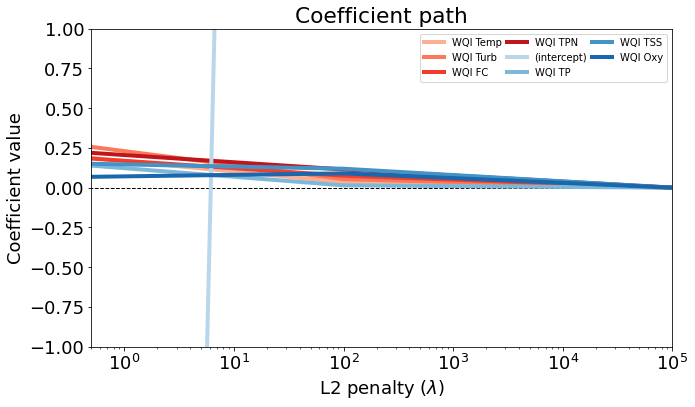

In [150]:
make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 0.05, 0.2, 1e2, 1e5])

Shows that L2_penalties betwee 0 and 1 does good more or less

## Function for k-fold cross validation

In [160]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    rss_sum=0

    for i in range(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set=data[start:end+1]
        training_set=data[0:start].append(data[end+1:n])
        model = turicreate.linear_regression.create(training_set, target = output_name, features = features_list, 
                                                  l2_penalty=l2_penalty,
                                                  validation_set=None,verbose=False)
        predictions = model.predict(validation_set)
        residuals = validation_set['Overall WQI'] - predictions
        rss = sum(residuals * residuals)
        rss_sum += rss
    validation_error = rss_sum / k # average = sum / size or you can use np.mean(list_of_validation_error)
    return validation_error  

In [170]:
def evaluate(model):
    rss_sum=0
    residuals = train_data['Overall WQI'] - model.predict(train_data)
    rss = sum(residuals * residuals)
    rss_sum += rss
    train_error = rss_sum/10
    return train_error

In [177]:
train_error = {}
train_error[0]   = evaluate(model_2_1)
train_error[0.05] = evaluate(model_2_2)
train_error[0.2]  = evaluate(model_2_3)
train_error[1e2] = evaluate(model_2_4)
train_error[1e5] = evaluate(model_2_5)
validation_error = {}
validation_error[0]   =k_fold_cross_validation(10,0, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[0.05]   =k_fold_cross_validation(10,0.05, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[0.2]  = k_fold_cross_validation(10,0.2, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[1e2] = k_fold_cross_validation(10,1e2, train_valid_shuffled, 'Overall WQI', main_features)
validation_error[1e5] = k_fold_cross_validation(10,1e5, train_valid_shuffled, 'Overall WQI', main_features)

In [178]:
train_error

{0: 2276.785471845899,
 0.05: 2275.055059039537,
 0.2: 2280.0217141721123,
 100.0: 5507.105725378506,
 100000.0: 14794.4422498073}

In [179]:
validation_error

{0: 2455.7033852736167,
 0.05: 2453.944091417855,
 0.2: 2449.4745158037704,
 100.0: 5697.398793093585,
 100000.0: 14859.12740236367}

In [190]:
# a simple report
for key in sorted(validation_accuracy.keys()):
    print("L2 penalty = %g" % key)
    print("train error = %s, validation_error = %s" % (train_error[key], validation_error[key]))
    print("--------------------------------------------------------------------------------")

L2 penalty = 0
train error = 2276.785471845899, validation_error = 2455.7033852736167
--------------------------------------------------------------------------------
L2 penalty = 0.05
train error = 2275.055059039537, validation_error = 2453.944091417855
--------------------------------------------------------------------------------
L2 penalty = 0.2
train error = 2280.0217141721123, validation_error = 2449.4745158037704
--------------------------------------------------------------------------------
L2 penalty = 100
train error = 5507.105725378506, validation_error = 5697.398793093585
--------------------------------------------------------------------------------
L2 penalty = 100000
train error = 14794.4422498073, validation_error = 14859.12740236367
--------------------------------------------------------------------------------


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

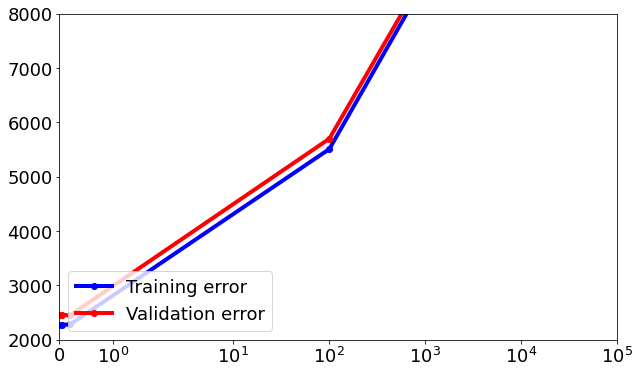

In [185]:
# Ploting error on training and validation sets over choice of L2 penalty.
plt.rcParams['figure.figsize'] = 10, 6

sorted_list = sorted(train_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'bo-', linewidth=4, label='Training error')
sorted_list = sorted(validation_accuracy.items(), key=lambda x:x[0])
plt.plot([p[0] for p in sorted_list], [p[1] for p in sorted_list], 'ro-', linewidth=4, label='Validation error')
plt.xscale('symlog')
plt.axis([0, 1e5, 2000, 8000])
plt.legend(loc='lower left')
plt.rcParams.update({'font.size': 18})
plt.tight_layout

l2_penalty =0.2 performs best as we can see after observing validaton error

In [188]:
l={}
l[1]=model_2_1.evaluate(test_data)
l[2]=model_2_2.evaluate(test_data)
l[3]=model_2_3.evaluate(test_data)

In [189]:
l

{1: {'max_error': 37.58455766029989, 'rmse': 6.500693963577057},
 2: {'max_error': 36.55627167559906, 'rmse': 6.445570770891686},
 3: {'max_error': 35.048622708184176, 'rmse': 6.42200646793368}}

**The max_error of our model is 35.048622708184176 and it's 'rmse' is  6.42200646793368 which is pretty decent**


Since the coefficients are more or less same, Ridge regression is not required.Still an l2_penalty between 0.2-0.05 gives best results.  

# Model Using Logistic Classifier

This is a multiple class problem and can be solved using logistic regression.
**Based on designations set by CCME(2005) to classify water based on WQI.**
```
Excellent     95-100     All measurements are within objectives virtually all of the time
```
```
Good          80-94      Conditions rarely depart from natural or desirable levels
```
```
Fair          65-79      Conditions sometimes depart from natural or desirable levels
```
```
Marginal      45-64      Conditions often depart from natural or desirable levels
```
```
Poor           0-44      Conditions usually depart from natural or desirable levels**
```

In [220]:
model_3=turicreate.logistic_classifier.create(train_data, target = 'quality', features = main_features, 
                                                  l2_penalty=0.05,
                                                  verbose=False)

In [221]:
model_3.evaluate(test_data)

{'accuracy': 0.7474747474747475,
 'auc': 0.9171532093348154,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 12
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     Poor     |     Marginal    |   4   |
 |     Fair     |     Marginal    |   2   |
 |   Marginal   |       Fair      |   16  |
 |   Marginal   |       Good      |   1   |
 |     Fair     |       Poor      |   1   |
 |   Marginal   |     Marginal    |   25  |
 |     Fair     |       Good      |   11  |
 |     Poor     |       Poor      |   3   |
 |     Good     |       Good      |   53  |
 |     Good     |       Fair      |   10  |
 +--------------+-----------------+-------+
 [12 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.5594986952071207,
 'log_loss': 0.732986314655099,


As we can see logistic regression does horribly on this problem,**mainly because the data set is highly unbalanced** 

## Precision and Recall

$$
[\text{precision}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all data points with positive predictions]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false positives}]}
$$

In [231]:
precision_1 = model_3.evaluate(test_data, metric='precision')['precision']
print ("Precision on test data: %s" % precision_1)

Precision on test data: 0.7585061443932412


A complementary metric i.e **recall**, which measures the ratio between the number of true positives and that of ground-truth:

$$
[\text{recall}] = \frac{[\text{# positive data points with positive predicitions}]}{\text{[# all positive data points]}} = \frac{[\text{# true positives}]}{[\text{# true positives}] + [\text{# false negatives}]}
$$



In [232]:
recall_1 = model_3.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall_1)

Recall on test data: 0.5384479717813051


In [229]:
model_3.predict_topk(test_data,output_type='probability')

id,class,probability
0,Fair,0.06887415564442365
0,Good,0.8721747557834804
0,Excellent,0.0585608090933859
1,Fair,0.7738847542234634
1,Marginal,0.11984953474039965
1,Good,0.10359585735459226
2,Good,0.8478395416908414
2,Excellent,0.14555387890161664
2,Fair,0.006596626877243471
3,Fair,0.07481862750640633


**As we can see precision recall values are not up to the mark,does pretty average**

# Model using Decision Trees

In [265]:
model_4=turicreate.decision_tree_classifier.create(train_data, target = 'quality', features = main_features,max_depth=9)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Decision tree classifier:

--------------------------------------------------------

Number of examples          : 734

Number of classes           : 5

Number of feature columns   : 8

Number of unpacked features : 8

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.034033     | 0.949591          | 0.666667            | 0.376750          | 1.046603            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [266]:
model_4.evaluate(test_data)

{'accuracy': 0.7121212121212122,
 'auc': 0.8659462390778746,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 14
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     Poor     |       Fair      |   1   |
 |     Poor     |     Marginal    |   2   |
 |     Poor     |       Poor      |   4   |
 |  Excellent   |    Excellent    |   1   |
 |     Fair     |     Marginal    |   8   |
 |   Marginal   |       Fair      |   15  |
 |     Fair     |       Poor      |   1   |
 |   Marginal   |     Marginal    |   27  |
 |     Good     |       Good      |   51  |
 |     Good     |    Excellent    |   1   |
 +--------------+-----------------+-------+
 [14 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.6214895419257169,
 'log_loss': 0.8639585633535194,

In [269]:
precision_2 = model_4.evaluate(test_data, metric='precision')['precision']
print ("Precision on test data: %s" % precision_1)

Precision on test data: 0.6902426211377618


In [270]:
recall_2 = model_4.evaluate(test_data, metric='recall')['recall']
print("Recall on test data: %s" % recall_1)

Recall on test data: 0.5384479717813051


**Boosted Decision Trees performs equally poor on the data**